Machine Learning in Agriculture

Recently we have observed the emerging concept of smart farming that makes agriculture more efficient and effective with the help of high-precision algorithms. The mechanism that drives it is Machine Learning — the scientific field that gives machines the ability to learn without being strictly programmed. It has emerged together with big data technologies and high-performance computing to create new opportunities to unravel, quantify, and understand data intensive processes in agricultural operational environments.

Machine learning is everywhere throughout the whole growing and harvesting cycle. It begins with a seed being planted in the soil — from the soil preparation, seeds breeding and water feed measurement — and it ends when neural networks pick up the harvest determining the ripeness with the help of computer vision.

The Toxic Pesticides
Though, many of us don't appreciate much, but a farmer's job is real test of endurance and determination. Once the seeds are sown, he works days and nights to make sure that he cultivates a good harvest at the end of season. A good harvest is ensured by several factors such as availability of water, soil fertility, protecting crops from rodents, timely use of pesticides & other useful chemicals and nature. While a lot of these factors are difficult to control for, the amount and frequency of pesticides is something the farmer can control.

Pesticides are also special, because while they protect the crop with the right dosage. But, if you add more than required, they may spoil the entire harvest. A high level of pesticide can deem the crop dead / unsuitable for consumption among many outcomes. This data is based on crops harvested by various farmers at the end of harvest season. To simplify the problem, you can assume that all other factors like variations in farming techniques have been controlled for.

 "we need to determine the outcome of the harvest season, i.e. whether the crop would be healthy (alive), damaged by pesticides or damaged by other reasons."

# Data Processing

In [1]:
#importing all the necssary libreray
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading the dataset
df=pd.read_csv("train_agriculture.csv")

#lets see insights of the data sets
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [3]:
df.tail()


,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
4594,F00008078,2138,0,1,2,20,NaN,1,1,1
4595,F00008079,2139,0,1,2,30,47.0,2,1,1
4596,F00008080,2267,0,1,2,10,7.0,27,2,0
4597,F00008082,2267,0,1,2,10,20.0,24,2,0
4598,F00008083,2267,0,1,2,10,33.0,17,2,0


In [4]:
#checking the data types
df.dtypes

ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [5]:
#checking the column values
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [6]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [7]:
#cheking the shape
df.shape

(4599, 10)

In [8]:
#Observation
#There are total 4599 rows and 10 columns
#Number_Weeks_Used has null values
#ID has data type object rest all integers
#ID-unique ID of crop
#Estimated_Insects_Count-estimated insects per 100 square meter
#Crop_Type-crop type(0,1)
#Soil_Type=soil type(0,1)
#Pesticide_Use_Category-type of pestiside used(1-never,2-last used,3-currently used)
#Number_Doses_Week-number of doeses per week
#Number_Weeks_Used-number of weeks uded
#Number_Weeks_Quit-nuber of weeks quit
#season-season catagory(1,2,3)
#Crop_Damage-crop damage catagory(0-alive,1-damage due to other cause,2-damage due to pestisde)

# Summary statistics

In [9]:
df.describe(include="all")

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4157.000000,4599.000000,4599.000000,4599.000000
unique,4599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,F00005378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,NaN,814.439120,0.417517,0.499508,0.471978,15.524647,12.586005,9.713253,0.694952,0.454597
min,NaN,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,NaN,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,NaN,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,NaN,1786.000000,0.000000,1.000000,3.000000,40.000000,38.000000,16.000000,2.000000,0.000000


In [10]:
#There are 4599 unique IDs
#chances of outliers are more in Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit sice difference between 75% and 100% is more


<AxesSubplot:>

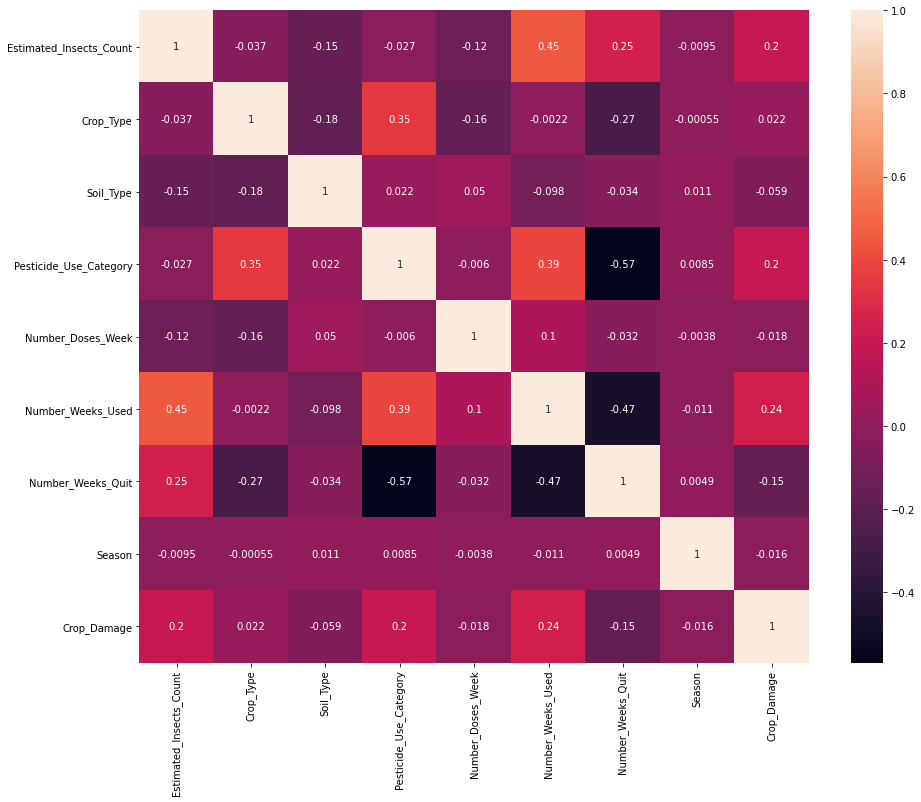

In [11]:
#checking the correlation
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(),annot=True)

# Univariant analysis

count    4599.000000
mean     1363.000435
std       814.439120
min       150.000000
25%       731.000000
50%      1212.000000
75%      1786.000000
max      4097.000000
Name: Estimated_Insects_Count, dtype: float64

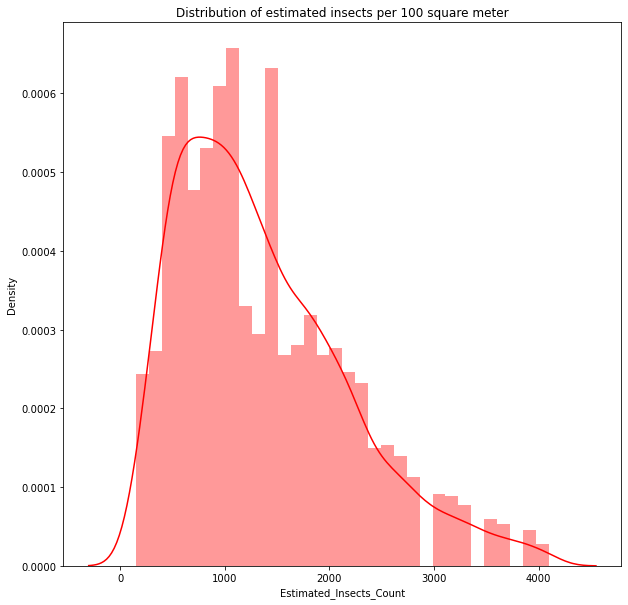

In [12]:
#analysis of Estimated_Insects_Count
plt.figure(figsize=(10,10))
sns.distplot(df["Estimated_Insects_Count"],color="r")
plt.title("Distribution of estimated insects per 100 square meter")
df["Estimated_Insects_Count"].describe()

In [13]:
#Observation
#Estimated insects per 100 square meter is below 2000 for more than 75% of the cases
#Average Estimated insects per 100 square meter is 1363
#maximum Estimated insects per 100 square meter is 4097
#minimum Estimated insects per 100 square meter is 150

In [14]:
#Lets fill the nan values
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy="median")
df['Number_Weeks_Used']=si.fit_transform(df['Number_Weeks_Used'].values.reshape(-1,1))




Describing the column Number_Doses_Week
count    4599.000000
mean       26.477495
std        15.524647
min         0.000000
25%        15.000000
50%        20.000000
75%        40.000000
max        95.000000
Name: Number_Doses_Week, dtype: float64


Describing the column Number_Weeks_Used
count    4599.000000
mean       28.805392
std        11.968667
min         0.000000
25%        20.000000
50%        28.000000
75%        36.000000
max        66.000000
Name: Number_Weeks_Used, dtype: float64


Describing the column Number_Weeks_Quit
count    4599.000000
mean        9.205479
std         9.713253
min         0.000000
25%         0.000000
50%         7.000000
75%        16.000000
max        47.000000
Name: Number_Weeks_Quit, dtype: float64


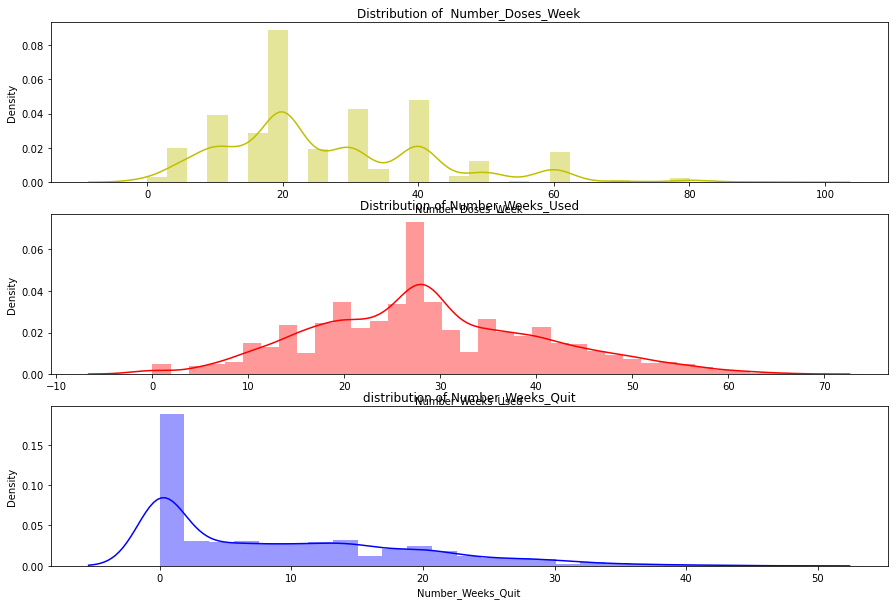

In [15]:
#Analysis of Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit
fig,(ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,10))
sns.distplot(df["Number_Doses_Week"],ax=ax1,color="y")
ax1.set_title("Distribution of  Number_Doses_Week")
sns.distplot(df["Number_Weeks_Used"],ax=ax2,color="r")
ax2.set_title("Distribution of Number_Weeks_Used")
sns.distplot(df["Number_Weeks_Quit"],ax=ax3,color="b")
ax3.set_title("distribution of Number_Weeks_Quit")

list1=["Number_Doses_Week","Number_Weeks_Used","Number_Weeks_Quit"]
for i in list1:
    print("\n")
    print("Describing the column",i)
    print(df[i].describe())

In [16]:
#Observation
#1 number of doeses per week-
  #Average doese per week is 26
  #maximum doeses per week is 95 and minimum is 0
  #most of the people use 20 doeses per week and 50% of people use below 20 doses per week
#2 Number_Weeks_Used-
  #Average Number_Weeks_Used is 28.89
  #maximum Number_Weeks_Used is 66 and minimum is 0
  # 50% of people use below 28 weeks
#3 Number_Weeks_Quit-
  #Average Number_Weeks_Quit is 9.20
  #maximum Number_Weeks_Quit is 47 and minimum is 0
  # 50% of people quit below 7 weeks



Values of each catagories of  Crop_Type
0    3565
1    1034
Name: Crop_Type, dtype: int64


Values of each catagories of  Soil_Type
0    2407
1    2192
Name: Soil_Type, dtype: int64


Values of each catagories of  Season
2    2327
1    1379
3     893
Name: Season, dtype: int64


Values of each catagories of  Crop_Damage
0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64


Values of each catagories of  Pesticide_Use_Category
2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64


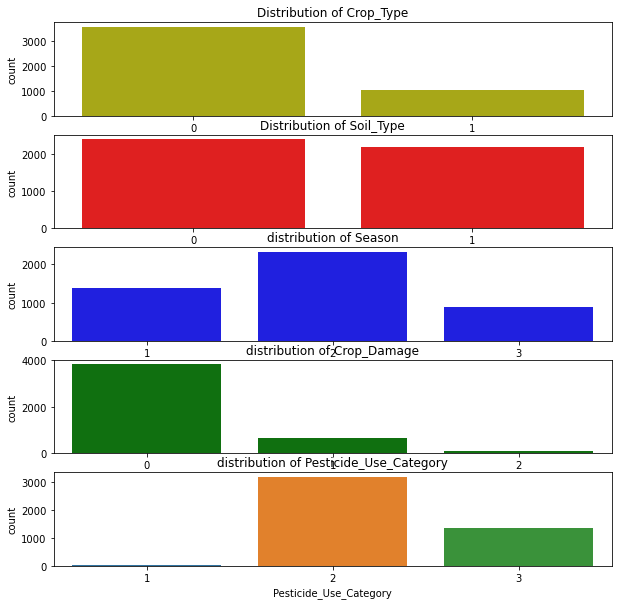

In [17]:
#Analysis of Crop_Type, Soil_Type,Season,Crop_Damage
fig,(ax1,ax2,ax3,ax4,ax5) = plt.subplots(5,1,figsize=(10,10))
sns.countplot(df["Crop_Type"],ax=ax1,color="y")
ax1.set_title("Distribution of Crop_Type")
sns.countplot(df["Soil_Type"],ax=ax2,color="r")
ax2.set_title("Distribution of Soil_Type")
sns.countplot(df["Season"],ax=ax3,color="b")
ax3.set_title("distribution of Season")
sns.countplot(df["Crop_Damage"],ax=ax4,color="g")
ax4.set_title("distribution of Crop_Damage")
sns.countplot(df["Pesticide_Use_Category"],ax=ax5)
ax5.set_title("distribution of Pesticide_Use_Category")
list2=["Crop_Type","Soil_Type","Season","Crop_Damage","Pesticide_Use_Category"]
for i in list2:
    print("\n")
    print("Values of each catagories of ",i)
    print(df[i].value_counts())

In [18]:
#Observation
#Crop type 0 is most 3565
#soil type 0 is most 2417
#season 2 is most 2327
#crop damage 0(alive) is most 3820
#Pesticide Use Category 2(previously used) is most 3205

# Bi-variant analysis

In [19]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

average Estimated Insects Count 
 Crop_Damage
0    1282.352094
1    1772.251506
2    1678.947826
Name: Estimated_Insects_Count, dtype: float64
maximum Estimated Insects Count 
 Crop_Damage
0    4097
1    4097
2    3896
Name: Estimated_Insects_Count, dtype: int64
minimum Estimated Insects Count 
 Crop_Damage
0    150
1    150
2    448
Name: Estimated_Insects_Count, dtype: int64


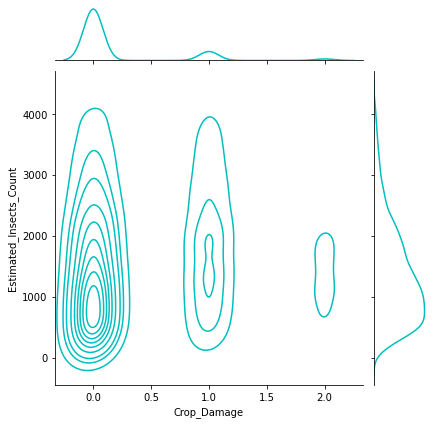

In [20]:
#Analysis of effect of Estimated_Insects_Count on crop damage
sns.jointplot(x=df["Crop_Damage"],y=df["Estimated_Insects_Count"], color="c",kind="kde")
print("average Estimated Insects Count","\n",df.groupby("Crop_Damage").mean()["Estimated_Insects_Count"])
print("maximum Estimated Insects Count","\n",df.groupby("Crop_Damage").max()["Estimated_Insects_Count"])
print("minimum Estimated Insects Count","\n",df.groupby("Crop_Damage").min()["Estimated_Insects_Count"])


In [21]:
#Observation
#Most number of estimated value counts belongs to crop damage 0 and 2 has least.
#where avaerage estimated counts of crop damage 0 is 1282.352094,maximum value is 4097,minimum value is 150
#Avaerage estimated counts of crop damage 2 is 1678.947826,maximum value is 3896,minimum value is 448
#Avaerage estimated counts of crop damage 1 is highest 1772.251506,maximum value is 4097,minimum value is 150

average Number Doses per  Week 
 Crop_Damage
0    26.692408
1    24.902108
2    28.434783
Name: Number_Doses_Week, dtype: float64
maximum Number Doses per  Week 
 Crop_Damage
0    95
1    85
2    80
Name: Number_Doses_Week, dtype: int64
minimum Number Doses per  Week 
 Crop_Damage
0    0
1    0
2    0
Name: Number_Doses_Week, dtype: int64


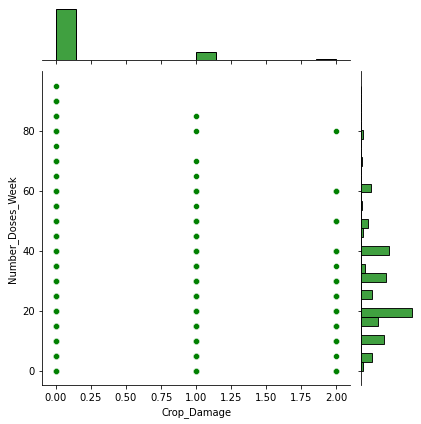

In [22]:
#Analysis of effect of Number Doses Week on crop damage
sns.jointplot(x=df["Crop_Damage"],y=df["Number_Doses_Week"], color="g")
print("average Number Doses per  Week","\n",df.groupby("Crop_Damage").mean()["Number_Doses_Week"])
print("maximum Number Doses per  Week","\n",df.groupby("Crop_Damage").max()["Number_Doses_Week"])
print("minimum Number Doses per  Week","\n",df.groupby("Crop_Damage").min()["Number_Doses_Week"])


In [23]:
#Observation
#Most Number Doses per  Week belongs to crop damage 0 and 2 has least.
# avaerage Number Doses per Week for crop damage 0 is 26.692408,maximum value is 95,minimum value is 0
#avaerage Number Doses per Week for crop damage 1 is 24.902108,maximum value is 85,minimum value is 0
#avaerage Number Doses per Week for crop damage 2 is highest 28.434783,maximum value is 80,minimum value is 0

average Number of Weeks Used  
 Crop_Damage
0    27.562042
1    34.391566
2    37.852174
Name: Number_Weeks_Used, dtype: float64
maximum Number of Weeks Used 
 Crop_Damage
0    66.0
1    66.0
2    62.0
Name: Number_Weeks_Used, dtype: float64
minimum Number of Weeks Used 
 Crop_Damage
0    0.0
1    0.0
2    0.0
Name: Number_Weeks_Used, dtype: float64


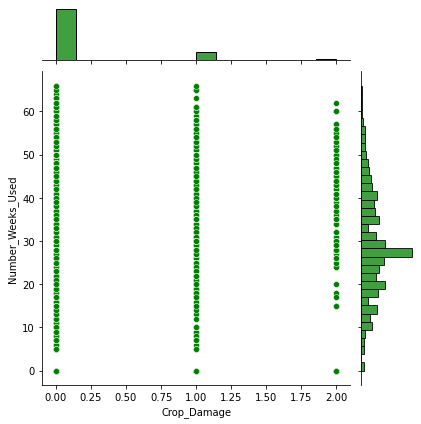

In [24]:
#Analysis of effect of Number Weeks Used on crop damage
sns.jointplot(x=df["Crop_Damage"],y=df["Number_Weeks_Used"], color="g")
print("average Number of Weeks Used ","\n",df.groupby("Crop_Damage").mean()["Number_Weeks_Used"])
print("maximum Number of Weeks Used","\n",df.groupby("Crop_Damage").max()["Number_Weeks_Used"])
print("minimum Number of Weeks Used","\n",df.groupby("Crop_Damage").min()["Number_Weeks_Used"])


In [25]:
#Observation
#Most Number Doses per  Week belongs to crop damage 0 and 2 has least.
# avaerage Number Doses per Week for crop damage 0 is 26.692408,maximum value is 95,minimum value is 0
#avaerage Number Doses per Week for crop damage 1 is 24.902108,maximum value is 85,minimum value is 0
#avaerage Number Doses per Week for crop damage 2 is highest 28.434783,maximum value is 80,minimum value is 0

Text(0.5, 1.0, 'Crop_Damage vs pesticide_Use_Category')

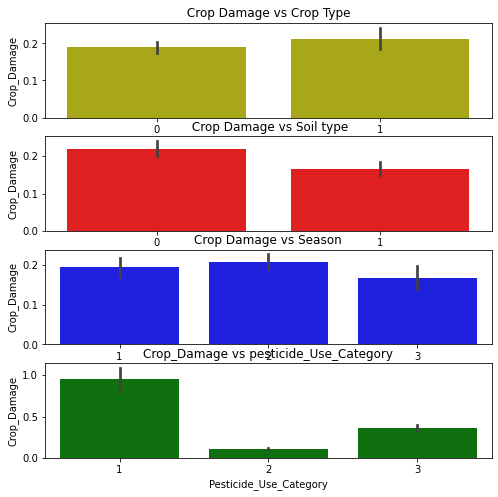

In [26]:
#Analysis of Crop_Type, Soil_Type,Season on Crop_Damage
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(8,8))
sns.barplot(y=df["Crop_Damage"],x=df["Crop_Type"],ax=ax1,color="y")
ax1.set_title(" Crop Damage vs Crop Type ")
sns.barplot(y=df["Crop_Damage"],x=df["Soil_Type"],ax=ax2,color="r")
ax2.set_title(" Crop Damage vs Soil type")
sns.barplot(y=df["Crop_Damage"],x=df["Season"],ax=ax3,color="b")
ax3.set_title("Crop Damage vs Season")
sns.barplot(y=df["Crop_Damage"],x=df["Pesticide_Use_Category"],ax=ax4,color="g")
ax4.set_title("Crop_Damage vs pesticide_Use_Category")


In [27]:
#Observation
#crop damage is high in crop type 1
#crop damage is high in soil type 0
#crop damage is high in season 2 and low in 3
#crop damage is high in pestiside use catagory 1 and low in 2

# Multivariant analysis

In [28]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

<AxesSubplot:xlabel='Crop_Damage', ylabel='Estimated_Insects_Count'>

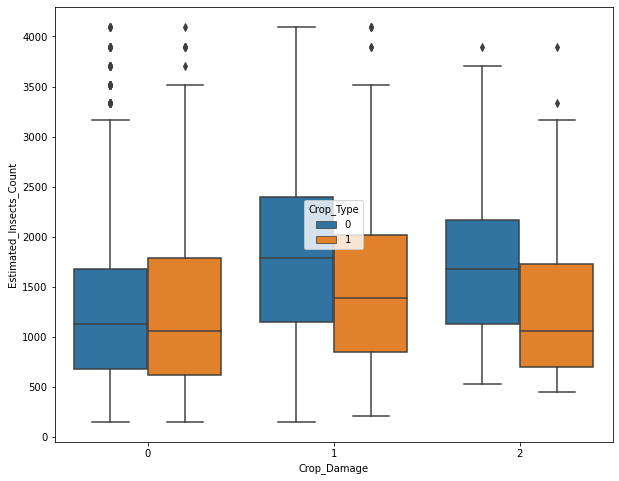

In [29]:
#Analysis of estimated insects counts vs crop type for various crop damages
plt.figure(figsize=(10,8))
sns.boxplot(y=df["Estimated_Insects_Count"],x=df["Crop_Damage"],hue='Crop_Type', data=df)

In [30]:
#Observations
#estimated insects counts is low for crop type 0 and crop damage  0(alive)
#estimated insects counts is high  for crop type 0 and crop damage  1-damage due to other cause

<AxesSubplot:xlabel='Crop_Damage', ylabel='Estimated_Insects_Count'>

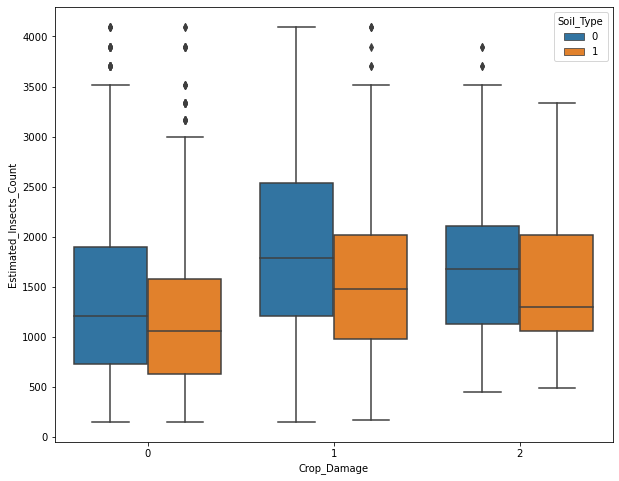

In [31]:
#Analysis of estimated insects counts vs soil type for various crop damages
plt.figure(figsize=(10,8))
sns.boxplot(y=df["Estimated_Insects_Count"],x=df["Crop_Damage"],hue='Soil_Type', data=df)

In [32]:
#Observations
#estimated insects counts is low for soil type 1 and crop damage  0(alive)
#estimated insects counts is high  for soil type 0 and crop damage  1-damage due to other cause

<AxesSubplot:xlabel='Crop_Damage', ylabel='Estimated_Insects_Count'>

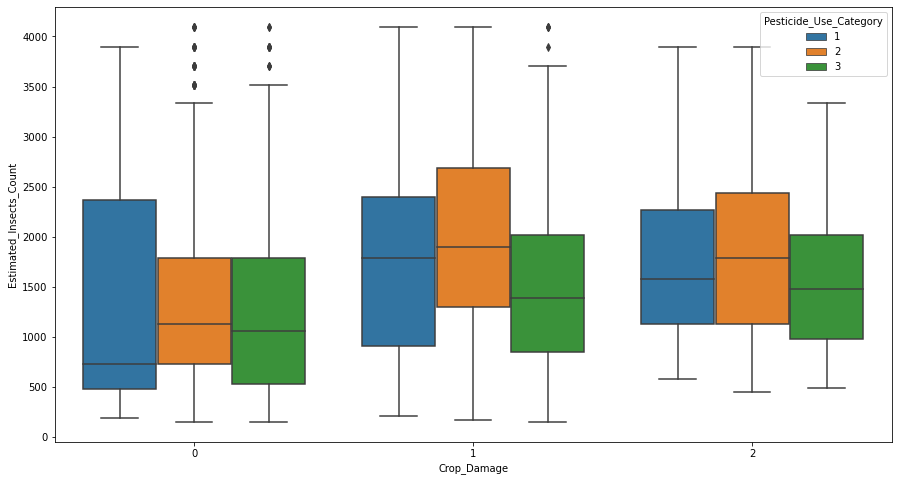

In [33]:
#Analysis of estimated insects counts vs Pesticide_Use_Category various crop damages
plt.figure(figsize=(15,8))
sns.boxplot(y=df["Estimated_Insects_Count"],x=df["Crop_Damage"],hue='Pesticide_Use_Category', data=df)

In [34]:

#Pesticide_Use_Category-type of pestiside used(1-never,2-last used,3-currently used)
#Crop_Damage-crop damage catagory(0-alive,1-damage due to other cause,2-damage due to pestisde)

#Observations
#insect count is more if pestiside is never(1) used especially in alive plants(0)
#insect count is less if pestiside is last used or currently used(1 or 2)  especially in alive plants(0)

Estimated_Insects_Count       AxesSubplot(0.125,0.657941;0.168478x0.222059)
Crop_Type                  AxesSubplot(0.327174,0.657941;0.168478x0.222059)
Soil_Type                  AxesSubplot(0.529348,0.657941;0.168478x0.222059)
Pesticide_Use_Category     AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Number_Doses_Week             AxesSubplot(0.125,0.391471;0.168478x0.222059)
Number_Weeks_Used          AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Number_Weeks_Quit          AxesSubplot(0.529348,0.391471;0.168478x0.222059)
Season                     AxesSubplot(0.731522,0.391471;0.168478x0.222059)
Crop_Damage                      AxesSubplot(0.125,0.125;0.168478x0.222059)
dtype: object

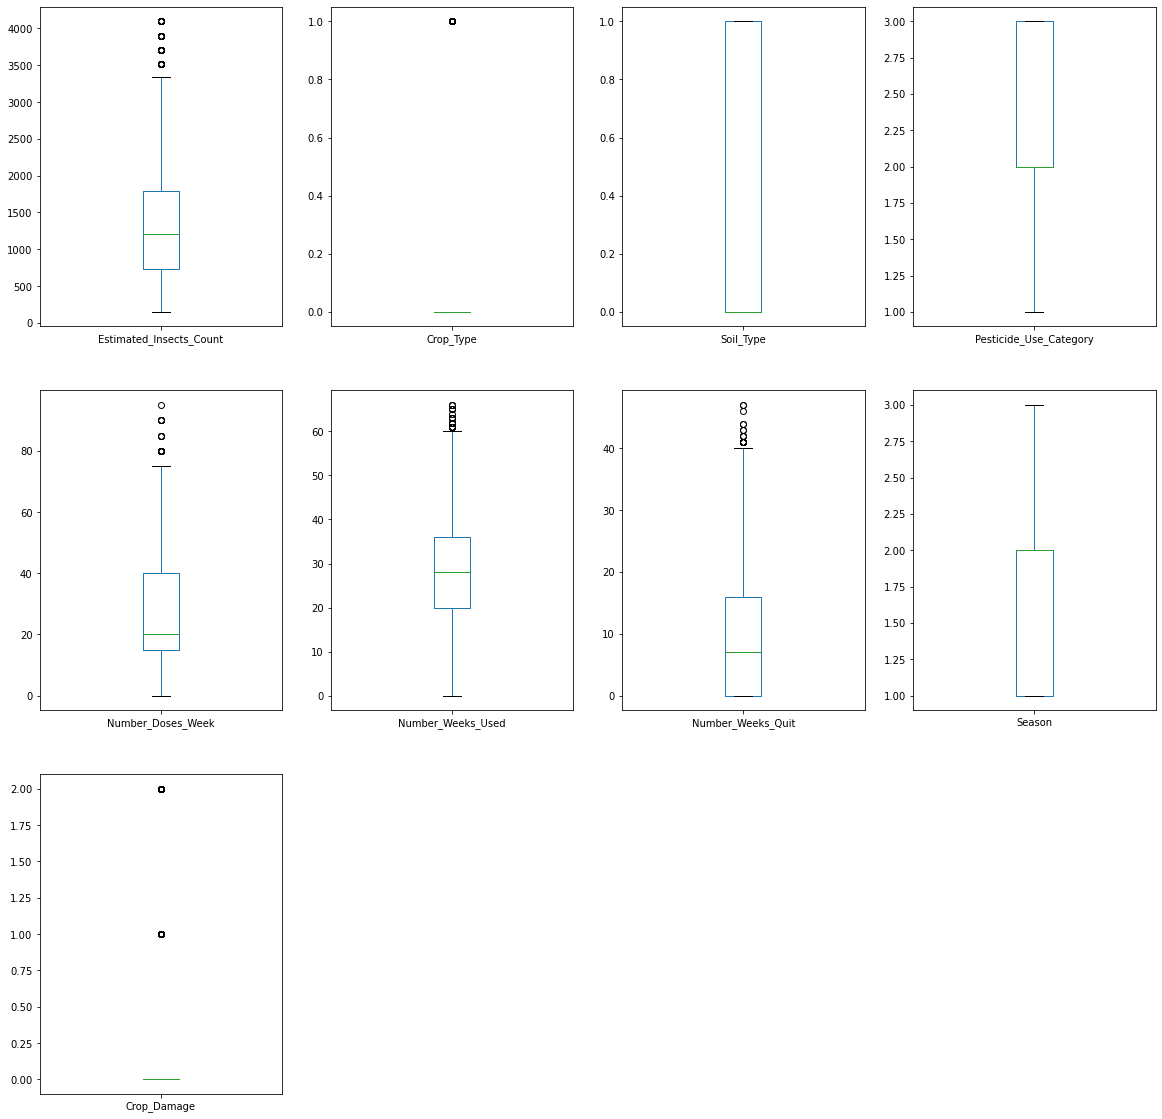

In [35]:
#Cheking the outliers
df.plot(kind="box", subplots=True, layout=(3,4),figsize=(20,20))

In [36]:
#we can see outliers in some of the continues variable data

In [37]:
#thier is a ID column which is not usefull lets drop that column
df.drop(labels="ID",axis=1,inplace=True)

0.9114689972451613


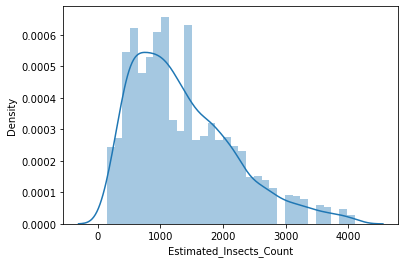

1.3186932804237115


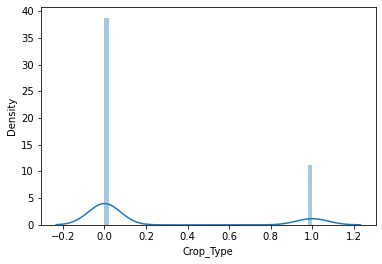

0.09363146624406116


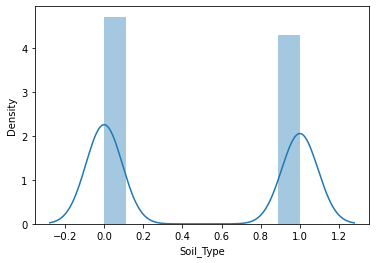

0.6785859622940752


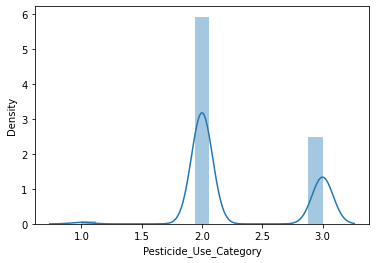

0.9458948843705007


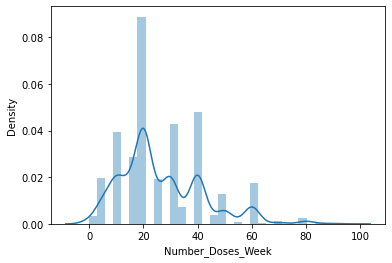

0.29989756951360025


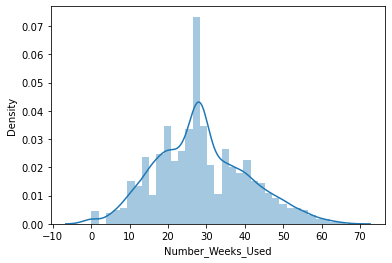

0.9197714184164273


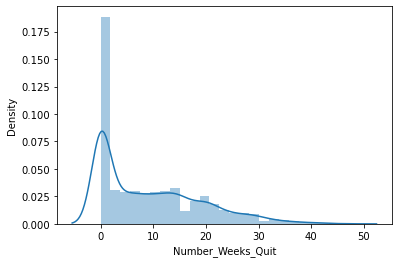

0.14484107305659358


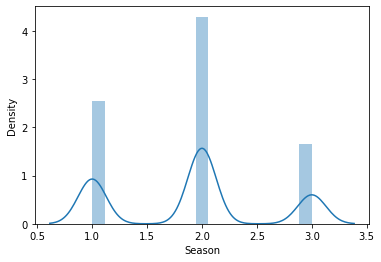

2.306932607694671


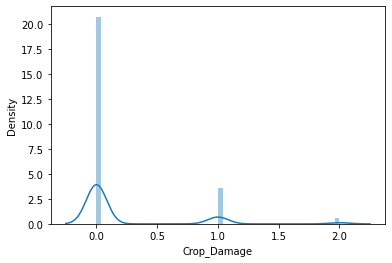

In [38]:
#Cheking skewness
for i in df.columns:
    print(df[i].skew())
    sns.distplot(df[i])
    plt.show()

In [39]:
#skewness is present in some of the continues variables


# Data cleaning and transformation

In [40]:
df.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [41]:
#removing the outliers
print(df.shape)
from scipy.stats import zscore
z=np.abs(zscore(df.drop([ 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', ],axis=1)))
z

(4599, 9)


array([[1.44286807, 1.28702725, 0.42765624],
       [1.41708065, 0.15207762, 1.77233374],
       [1.35813798, 0.15207762, 1.77233374],
       ...,
       [1.11008649, 0.15207762, 0.42765624],
       [1.11008649, 0.15207762, 0.42765624],
       [1.11008649, 0.15207762, 0.42765624]])

In [42]:
df_new=df[(z<3).all(axis=1)]
print(df_new.shape)
percentage_ofouliers=((4599-4444)/4599)*100

print("using z score percentage of outlier removed:",percentage_ofouliers)

(4444, 9)
using z score percentage of outlier removed: 3.370297890845836


In [43]:
#Chwking the  new skewness
df_new.skew()

Estimated_Insects_Count    0.802134
Crop_Type                  1.326699
Soil_Type                  0.079297
Pesticide_Use_Category     0.762095
Number_Doses_Week          0.953930
Number_Weeks_Used          0.325391
Number_Weeks_Quit          0.890478
Season                     0.142235
Crop_Damage                2.005290
dtype: float64

In [44]:
#Assigning the variables for indipendent and dependent features
x=df_new.drop(labels="Crop_Damage",axis=1)
y=df_new["Crop_Damage"]


In [45]:
#Removeing the skewness
from sklearn.preprocessing import power_transform
x=power_transform(x,method=("yeo-johnson"))

In [46]:
#standardizing the values
from sklearn.preprocessing import StandardScaler
sl=StandardScaler()
print(sl.fit(x))


StandardScaler()


# Model Fitting

In [60]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
#Optimizer
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import make_scorer
#evaluation metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

import warnings
warnings.filterwarnings("ignore")

In [48]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for i in range(42,105):
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=i)
        md=model()
        md.fit(x_train,y_train)
        predict=md.predict(x_test)
        accuracyscore=accuracy_score(y_test,predict)
        if accuracyscore>max_score:
            max_score=accuracyscore
            max_state=i
    print("Max score is {} with random state {}".format(max_score,max_state))

In [66]:
model_select(LogisticRegression)

Max score is 0.8677573278800272 with random state 44


In [50]:
model_select(GaussianNB)

Max score is 0.858214042263122 with random state 44


In [51]:
model_select(KNeighborsClassifier)

Max score is 0.8588957055214724 with random state 44


In [52]:
model_select(DecisionTreeClassifier)

Max score is 0.7948193592365371 with random state 55


In [53]:
#lest use ensemble technique and see the accuracy
model_select(RandomForestClassifier)

Max score is 0.8595773687798227 with random state 84


In [59]:
model_select(ExtraTreesClassifier)

Max score is 0.8534423994546694 with random state 55


In [61]:
model_select(GradientBoostingClassifier)

Max score is 0.8738922972051807 with random state 48


In [55]:
#From the above model training we can see GradientBoostingClassifier  after boosting best at random state 48 lets proceed with these values

In [78]:
#lets train the best
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=48)
print(x_train.shape, x_test.shape)

(3110, 8) (1334, 8)


In [79]:
cross_val_score(GradientBoostingClassifier(),x_train,y_train,cv=5).mean()

0.8479099678456592

In [80]:
#CV score and acuracy are almost same we can proceed with best parameter search

In [81]:
gd=GradientBoostingClassifier()

parameters={
    'learning_rate': [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    'n_estimators':[200],
    }
           
grid_cv = GridSearchCV(gd, parameters, scoring = make_scorer(accuracy_score))
grid_cv = grid_cv.fit(x_train,y_train)

print("Our optimized Random Forest model is:")
grid_cv.best_estimator_

Our optimized Random Forest model is:


GradientBoostingClassifier(learning_rate=0.025, n_estimators=200)

In [82]:
gd = grid_cv.best_estimator_

gd.fit(x_train, y_train)
pred_gd = lg.predict(x_test)
print("confusion matrix",confusion_matrix(y_test,pred_gd ))
print("\n")
print("classificationreport", classification_report(y_test,pred_gd))
print("accuracy score",accuracy_score(y_test,pred_gd))

confusion matrix [[1151    9]
 [ 159   15]]


classificationreport               precision    recall  f1-score   support

           0       0.88      0.99      0.93      1160
           1       0.62      0.09      0.15       174

    accuracy                           0.87      1334
   macro avg       0.75      0.54      0.54      1334
weighted avg       0.85      0.87      0.83      1334

accuracy score 0.8740629685157422


<AxesSubplot:>

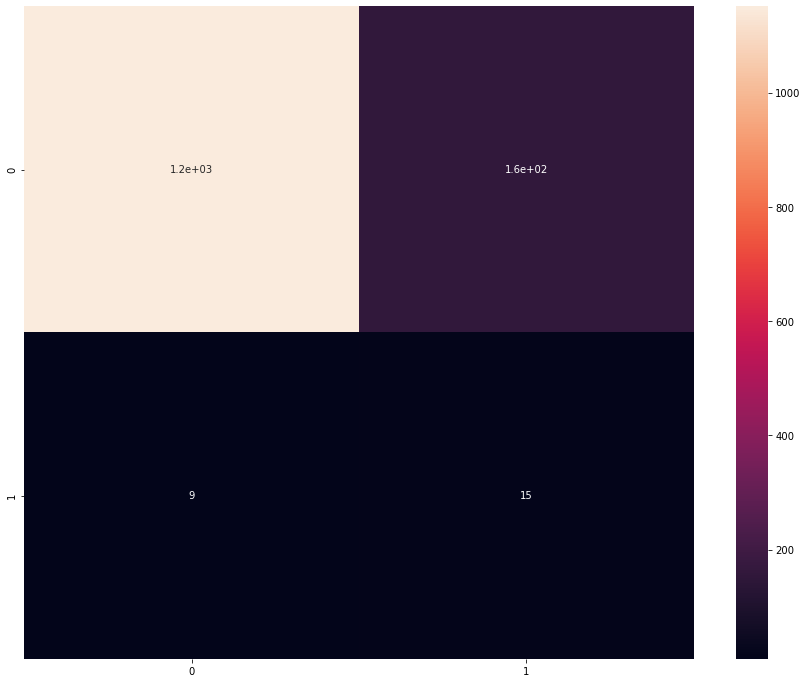

In [83]:
#confusion matrix in heat map
plt.figure(figsize=(15,12))
sns.heatmap(confusion_matrix(pred_gd, y_test), annot=True)

In [84]:
#after training with the best parameter we found gradiant search was the best performer lets save the data

In [85]:
import pickle
filename="agriculture_training_clasification.pkl"
pickle.dump(gd,open(filename,"wb"))

# We have Successfully saved our best model and now we will load the test data and do all the preprocessing and cleaning on our test data and then we will load our saved model from pickle library and apply it on our cleaned test data.

In [89]:

#Let's load the Data Set of Agriculture

df_test=pd.read_csv('test_agriculture.csv')

In [90]:
df_test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [91]:
df_test.tail()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
1194,F00003133,1132,0,1,2,40,34.0,7,3
1195,F00003135,1132,0,1,2,40,25.0,3,1
1196,F00003138,1132,0,1,2,20,13.0,23,1
1197,F00003149,1212,0,1,2,10,35.0,5,1
1198,F00003150,1212,0,1,2,15,NaN,20,3


In [92]:
#Let's check the shape of our DataSet

df_test.shape

(1199, 9)

We have 1199 rows and 9 columns in out test data set. Since it is a test data set so it contains only features and there is no target column in this dataset¶

In [94]:
#Let's check for the null values in our DataSet

df_test.isnull().sum()

ID                           0
Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

In [97]:
#Let's impute the missing values in our DataSet



si=SimpleImputer(strategy="median")
df_test['Number_Weeks_Used']=si.fit_transform(df_test['Number_Weeks_Used'].values.reshape(-1,1))

In [98]:
#Let's drop unnecessary colum which is not required for our prediction

df_test.drop(['ID'],inplace=True,axis=1)

In [100]:
#lets check the info once
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Estimated_Insects_Count  1199 non-null   int64  
 1   Crop_Type                1199 non-null   int64  
 2   Soil_Type                1199 non-null   int64  
 3   Pesticide_Use_Category   1199 non-null   int64  
 4   Number_Doses_Week        1199 non-null   int64  
 5   Number_Weeks_Used        1199 non-null   float64
 6   Number_Weeks_Quit        1199 non-null   int64  
 7   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 75.1 KB


In [102]:
#removing the outliers
print(df_test.shape)
from scipy.stats import zscore
z=np.abs(zscore(df_test.drop([ 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', ],axis=1)))
z

(1199, 8)


array([[1.30318366, 0.17280413],
       [1.04035366, 0.17280413],
       [0.78462718, 0.17280413],
       ...,
       [0.18556423, 1.28629553],
       [0.09085072, 1.28629553],
       [0.09085072, 1.63190379]])

In [104]:
df_new_test=df_test[(z<3).all(axis=1)]
print(df_new_test.shape)
percentage_ofouliers=((1199-1186)/1199)*100

print("using z score percentage of outlier removed:",percentage_ofouliers)

(1186, 8)
using z score percentage of outlier removed: 1.084236864053378


In [105]:
#Chwking the  new skewness
df_new_test.skew()

Estimated_Insects_Count    0.998784
Crop_Type                  1.550221
Soil_Type                  0.162627
Pesticide_Use_Category     0.089500
Number_Doses_Week          0.866668
Number_Weeks_Used          0.250380
Number_Weeks_Quit          1.204354
Season                     0.153962
dtype: float64

In [107]:
#Assigning the variables for indipendent features(thier is nom target variable)
x_test=df_new_test

In [108]:
#Removeing the skewness
from sklearn.preprocessing import power_transform
x_test=power_transform(x_test,method=("yeo-johnson"))

In [109]:
#standardizing the values
from sklearn.preprocessing import StandardScaler
sl=StandardScaler()
print(sl.fit(x_test))


StandardScaler()


In [112]:

#Let's load the saved model from pickle
filename= pickle.load( open( "agriculture_training_clasification.pkl", "rb" ) )
filename

GradientBoostingClassifier(learning_rate=0.025, n_estimators=200)

In [113]:
#lets predict the values
gbc_predict=filename.predict(x_test)
gbc_predict

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [114]:
pd.DataFrame(gbc_predict).rename(columns = {0 : 'Crop_Damage'})

,Crop_Damage
0,0
1,1
2,1
3,1
4,1
...,...
1181,0
1182,0
1183,0
1184,0


In [115]:

df_test_final = pd.read_csv('test_agriculture.csv')

df_ID = df_test_final[['ID']]

df_test_final = pd.concat([df_ID, pd.DataFrame(gbc_predict).rename(columns = {0 : 'Crop_Damage'})], axis=1)

df_test_final

,ID,Crop_Damage
0,F00000002,0.0
1,F00000007,1.0
2,F00000011,1.0
3,F00000013,1.0
4,F00000014,1.0
...,...,...
1194,F00003133,NaN
1195,F00003135,NaN
1196,F00003138,NaN
1197,F00003149,NaN


In [116]:
#Let's save the predicted result into the csv file

df_test_final.to_csv('Agriculture_tested.csv',index=False)

In [117]:
#now we have tested our data and saved the predicted values